# **1. Data Cleaning and Preparation**

## 1. Loading Data:

Importing libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


Since there are 2 data files so we import them both

In [41]:
data1 = pd.read_csv('Used Cars Data/pakwheels_used_cars.csv')
data2 = pd.read_csv('Used Cars Data/pakwheels_used_car_data_v02.csv')

In [42]:
data1.columns

Index(['ad_ref', 'assembly', 'body', 'ad_city', 'color', 'engine_cc',
       'fuel_type', 'make', 'mileage', 'model', 'registered', 'transmission',
       'year', 'price'],
      dtype='object')

In [43]:
data2.columns

Index(['addref', 'city', 'assembly', 'body', 'make', 'model', 'year', 'engine',
       'transmission', 'fuel', 'color', 'registered', 'mileage', 'price'],
      dtype='object')

As we can see some columns have diffrent names or are reordered \
lets fix that first

In [44]:
# Renaming columns of data1 to match data2
data1_renamed = data1.rename(columns={
    'ad_ref': 'addref',
    'ad_city': 'city',
    'engine_cc': 'engine',
    'fuel_type': 'fuel'
})

# Reordering columns
data1_reordered = data1_renamed[data2.columns]

# Concatenating the two DataFrames
data = pd.concat([data2, data1_reordered], ignore_index=True)

print(data)

         addref        city  assembly       body    make    model    year  \
0       7943732    Peshawar       NaN      Sedan  Toyota  Corolla  2013.0   
1       7730314      Lahore       NaN      Sedan   Honda     City  2000.0   
2       7943737      Lahore       NaN      Sedan  Toyota    Yaris  2021.0   
3       7943733      Lahore       NaN  Hatchback  Suzuki    Swift  2017.0   
4       7923484      Lahore       NaN      Sedan   Honda    Civic  2017.0   
...         ...         ...       ...        ...     ...      ...     ...   
155110  7727137  Gujranwala  Imported  Micro Van  Suzuki    Every  1905.0   
155111  7733253     Karachi       NaN      Sedan  Toyota    Yaris  1905.0   
155112  7719906  Gujranwala  Imported  Micro Van  Suzuki    Every  1905.0   
155113  7627128   Islamabad       NaN      Sedan  Toyota  Corolla  1905.0   
155114  7758009     Karachi       NaN      Sedan   Honda    Civic  1905.0   

        engine transmission    fuel            color     registered  mileag

Now we have a 1 single dataframe

Understanding the data

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155115 entries, 0 to 155114
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   addref        155115 non-null  int64  
 1   city          155115 non-null  object 
 2   assembly      48165 non-null   object 
 3   body          137346 non-null  object 
 4   make          155115 non-null  object 
 5   model         155115 non-null  object 
 6   year          145615 non-null  float64
 7   engine        155110 non-null  float64
 8   transmission  155115 non-null  object 
 9   fuel          153275 non-null  object 
 10  color         152125 non-null  object 
 11  registered    155115 non-null  object 
 12  mileage       155115 non-null  int64  
 13  price         153883 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 16.6+ MB


## 2. Handling Missing Values:

In the data we say that all in assembly column all imported cars were marked \
so converting all the missing values into 'local'

In [46]:
data['assembly'] = data['assembly'].fillna('Local')

In [47]:
data.isnull().sum()

addref              0
city                0
assembly            0
body            17769
make                0
model               0
year             9500
engine              5
transmission        0
fuel             1840
color            2990
registered          0
mileage             0
price            1232
dtype: int64

Since now we cant really convert the rest of missing vlaues into either null or mean \
so instead to keep the data integrity lets drop all the rows with these missing values since we already have 155115 rows

In [48]:
data = data.dropna()

In [49]:
print(data)

         addref        city assembly       body    make    model    year  \
0       7943732    Peshawar    Local      Sedan  Toyota  Corolla  2013.0   
1       7730314      Lahore    Local      Sedan   Honda     City  2000.0   
2       7943737      Lahore    Local      Sedan  Toyota    Yaris  2021.0   
3       7943733      Lahore    Local  Hatchback  Suzuki    Swift  2017.0   
4       7923484      Lahore    Local      Sedan   Honda    Civic  2017.0   
...         ...         ...      ...        ...     ...      ...     ...   
155106  7612869  Abbottabad    Local  Hatchback  Suzuki   Mehran  1905.0   
155107  7445229   Islamabad    Local      Sedan  Toyota    Yaris  1905.0   
155108  7689859    Peshawar    Local      Sedan   Honda    Civic  1905.0   
155111  7733253     Karachi    Local      Sedan  Toyota    Yaris  1905.0   
155114  7758009     Karachi    Local      Sedan   Honda    Civic  1905.0   

        engine transmission    fuel             color registered  mileage  \
0       13

Even after dropping all the null entry rows we are still left with 126177 rows to work with

## 3. Data Transformation:

Dividing categorical and numerical features

In [50]:
numeric_features = ['addref', 'year', 'engine', 'mileage']
categorical_features = ['city', 'assembly', 'body', 'make', 'model','transmission', 'fuel', 'color', 'registered' ]

Intuitively analysing predicting price by rest of the features makes most sense \
so lets put price in y while the rest in x

In [51]:
X = data.drop(columns=['price'])
y = data['price']

So i am checking the unique vales of each categorical features to see which encoding to use

In [52]:
for column in categorical_features:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print(f"Data type: {data[column].dtype}")
    print("-" * 50)

Column: city
Unique values: ['Peshawar' 'Lahore' 'Vehari' 'Islamabad' 'Faisalabad' 'Sialkot'
 'Mansehra' 'Gujranwala' 'Kasur' 'Bahawalnagar' 'Karachi' 'Rawalpindi'
 'Quetta' 'Mardan' 'Pindi' 'Gujrat' 'Charsadda' 'Multan' 'Chichawatni'
 'Kohat' 'Chakwal' 'Abbottabad' 'Hafizabad' 'Nowshera' 'Okara' 'Sadiqabad'
 'Hyderabad' 'Wah' 'Haripur' 'D.G.Khan' 'Sargodha' 'Dadyal' 'Jaranwala'
 'Kharian' 'Haroonabad' 'Depal' 'Swabi' 'Muzaffar' 'Jhang' 'Bahawalpur'
 'Sahiwal' 'Daharki' 'Jalalpur' 'Rahim' 'Wazirabad' 'Dina' 'Gojra'
 'Jhelum' 'Chishtian' 'Mandi' 'Arifwala' 'Mingora' 'Khushab' 'Lakki'
 'Gujar' 'Hayatabad' 'Attock' 'Taxila' 'Ranipur' 'Dera' 'Bhalwal'
 'Shorkot' 'Renala' 'Abdul' 'Mirpur' 'Toba' 'Rajana' 'Bhakkar' 'Nawabshah'
 'Khairpur' 'Dargai' 'Bhera' 'Sheikhupura' 'Mian' 'Head' 'Sambrial'
 'Talagang' 'Swatmingora' 'Burewala' 'Mamu' 'Sukkur' 'Shakargarh' 'More'
 'Pattoki' 'Sohawa' 'Zafarwal' 'Satiana' 'Fort' 'Adda' 'Chowk' 'Akora'
 'Layyah' 'Dinga' 'Larkana' 'Kabirwala' 'Khanewal' 'Kamok

So out of 9 only 3 features had (3 or less) unique values
(cant use one-hot bcz number of features will increase a loooooot)
so instead of using label encoding for all lets use one-hot for these 3 features and label on all others.
since label encoding assumes ordinal relationship between values

In [53]:
#numeric_features = ['addref', 'year', 'engine', 'mileage', 'price']
cat1 = ['city', 'body', 'make', 'model', 'color', 'registered' ]
cat2 = ['assembly', 'transmission', 'fuel' ]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat2', OneHotEncoder(), cat2)
    ]
)
new_data = preprocessor.fit_transform(X)

# making a data frame back from numpy array
feature_names = preprocessor.get_feature_names_out()
transformed_data = pd.DataFrame(new_data, columns=feature_names)


# Apply Label Encoding to cat1 columns
label_encoders = {}
for col in cat1:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Combine preprocessed data with label-encoded cat1 columns
cat1_encoded = data[cat1].copy()  # Copy the label-encoded cat1 columns
combined = pd.concat([transformed_data, cat1_encoded.reset_index(drop=True)], axis=1)

combined.head()

,num__addref,num__year,num__engine,num__mileage,cat2__assembly_Imported,cat2__assembly_Local,cat2__transmission_Automatic,cat2__transmission_Manual,cat2__fuel_Diesel,cat2__fuel_Hybrid,cat2__fuel_Petrol,city,body,make,model,color,registered
0,0.533910,0.984824,-0.150258,0.640974,0.0,1.0,0.0,1.0,0.0,0.0,1.0,209,16,45,81,306,55
1,-0.307251,0.745899,-0.150258,1.654827,0.0,1.0,0.0,1.0,0.0,0.0,1.0,155,16,19,71,44,55
2,0.533929,1.131855,-0.150258,-0.366916,0.0,1.0,0.0,1.0,0.0,0.0,1.0,155,16,45,302,336,80
3,0.533914,1.058340,-0.150258,-0.050832,0.0,1.0,0.0,1.0,0.0,0.0,1.0,155,7,44,259,164,37
4,0.454105,1.058340,0.636057,-0.062760,0.0,1.0,1.0,0.0,0.0,0.0,1.0,155,16,19,72,164,55


In [54]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126177 entries, 0 to 126176
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   num__addref                   126177 non-null  float64
 1   num__year                     126177 non-null  float64
 2   num__engine                   126177 non-null  float64
 3   num__mileage                  126177 non-null  float64
 4   cat2__assembly_Imported       126177 non-null  float64
 5   cat2__assembly_Local          126177 non-null  float64
 6   cat2__transmission_Automatic  126177 non-null  float64
 7   cat2__transmission_Manual     126177 non-null  float64
 8   cat2__fuel_Diesel             126177 non-null  float64
 9   cat2__fuel_Hybrid             126177 non-null  float64
 10  cat2__fuel_Petrol             126177 non-null  float64
 11  city                          126177 non-null  int32  
 12  body                          126177 non-nul

## 4. Data Splitting:

Spliting the data into training and testing sets using an 80-20 split

In [55]:
# (80% - training, 20% - testing)
X_train, X_test, y_train, y_test = train_test_split(combined, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (100941, 17)
Testing data shape: (25236, 17)
Training labels shape: (100941,)
Testing labels shape: (25236,)


Now the data has been 80-20% splitted with 17 features and predicting column is price

# **2. Data Analysis and Visualization**

## 1. Exploratory Data Analysis (EDA):

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126177 entries, 0 to 155114
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   addref        126177 non-null  int64  
 1   city          126177 non-null  int32  
 2   assembly      126177 non-null  object 
 3   body          126177 non-null  int32  
 4   make          126177 non-null  int32  
 5   model         126177 non-null  int32  
 6   year          126177 non-null  float64
 7   engine        126177 non-null  float64
 8   transmission  126177 non-null  object 
 9   fuel          126177 non-null  object 
 10  color         126177 non-null  int32  
 11  registered    126177 non-null  int32  
 12  mileage       126177 non-null  int64  
 13  price         126177 non-null  float64
dtypes: float64(3), int32(6), int64(2), object(3)
memory usage: 11.6+ MB


In [57]:
data.describe()

,addref,city,body,make,model,year,engine,color,registered,mileage,price
count,1.261770e+05,126177.000000,126177.000000,126177.000000,126177.000000,126177.000000,126177.000000,126177.000000,126177.000000,126177.000000,1.261770e+05
mean,7.808269e+06,143.190328,11.808967,35.156201,123.281834,1959.415440,1395.545591,243.959557,59.661959,91261.693629,3.855047e+06
std,2.537195e+05,59.911454,4.618415,12.705168,79.543327,54.410502,635.880125,123.463174,22.328984,83838.874090,5.297704e+06
min,4.478110e+05,0.000000,0.000000,0.000000,0.000000,1905.000000,100.000000,0.000000,0.000000,1.000000,1.100000e+05
25%,7.801951e+06,98.000000,7.000000,19.000000,72.000000,1905.000000,1000.000000,157.000000,37.000000,38000.000000,1.550000e+06
50%,7.861680e+06,140.000000,15.000000,44.000000,81.000000,1991.000000,1300.000000,304.000000,55.000000,80000.000000,2.790000e+06
75%,7.904505e+06,182.000000,16.000000,45.000000,168.000000,2015.000000,1600.000000,359.000000,80.000000,122222.000000,4.515000e+06
max,7.943741e+06,289.000000,20.000000,49.000000,307.000000,2022.000000,15000.000000,383.000000,106.000000,1000000.000000,5.290000e+08


## 2. Visualization:

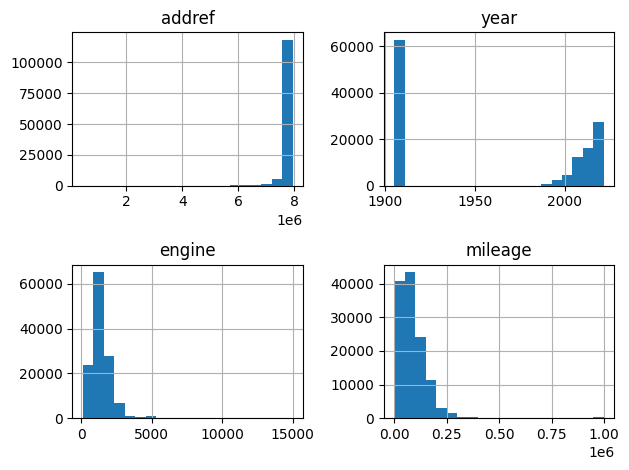

In [58]:
# Histograms for numeric features
data[numeric_features].hist(bins=20)
plt.tight_layout()
plt.show()

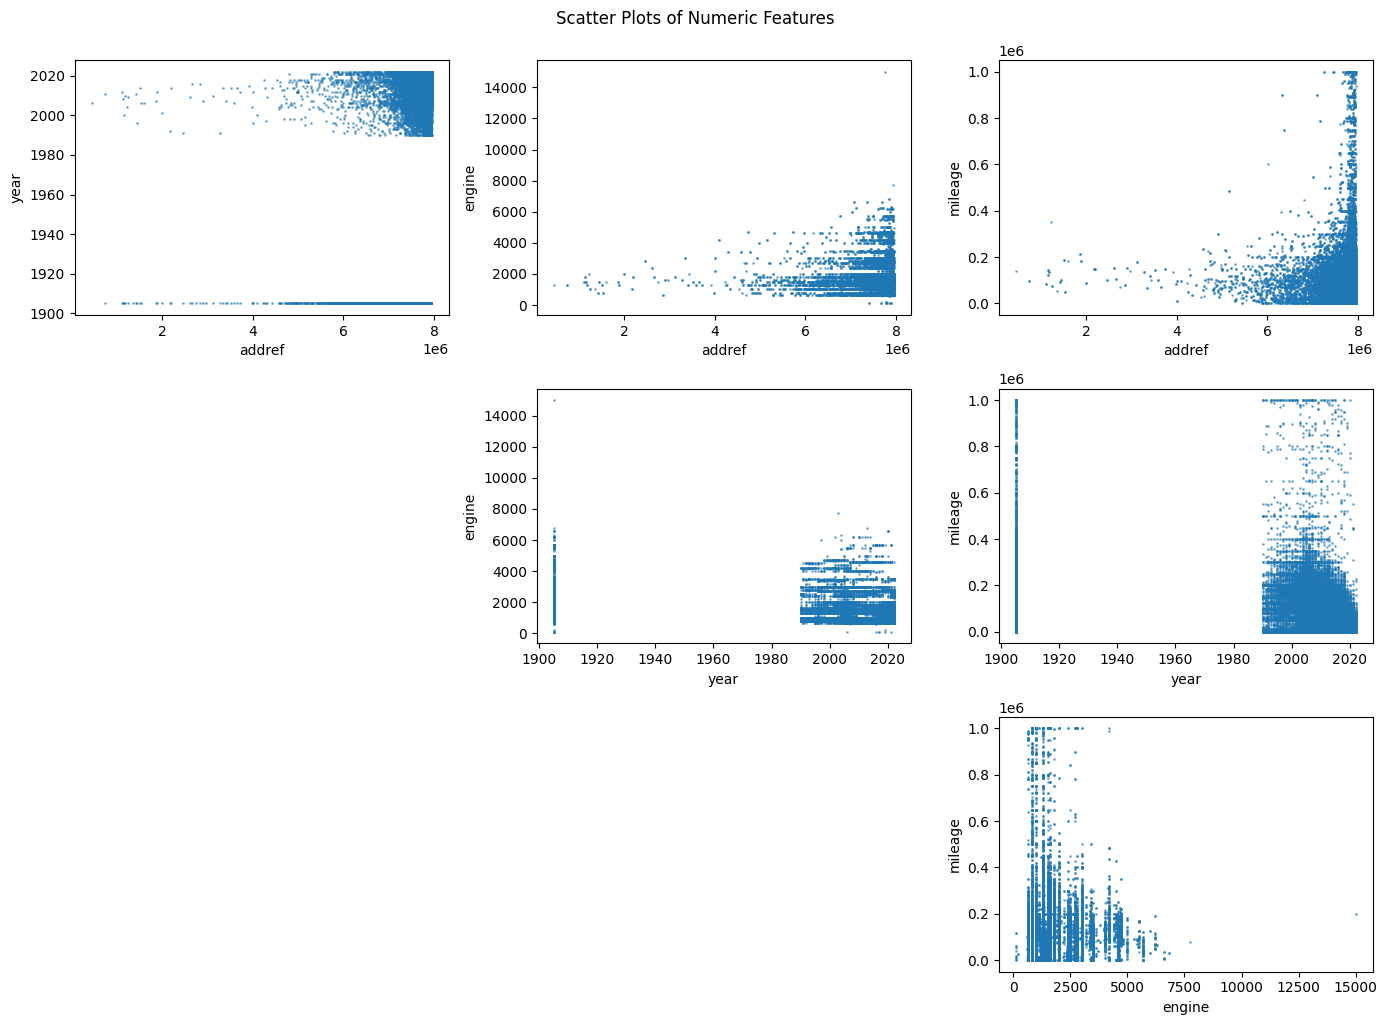

In [59]:
# Plot scatter plots for each pair of features
plt.figure(figsize=(14, 10))
for i in range(len(numeric_features)):
    for j in range(i + 1, len(numeric_features)):
        plt.subplot(len(numeric_features) - 1, len(numeric_features) - 1, i * (len(numeric_features) - 1) + j)
        plt.scatter(data[numeric_features[i]], data[numeric_features[j]], alpha=0.5, s=1)
        plt.xlabel(numeric_features[i])
        plt.ylabel(numeric_features[j])

plt.tight_layout()  # Adjust layout
plt.suptitle('Scatter Plots of Numeric Features', y=1.02)  # Title above all plots
plt.show()

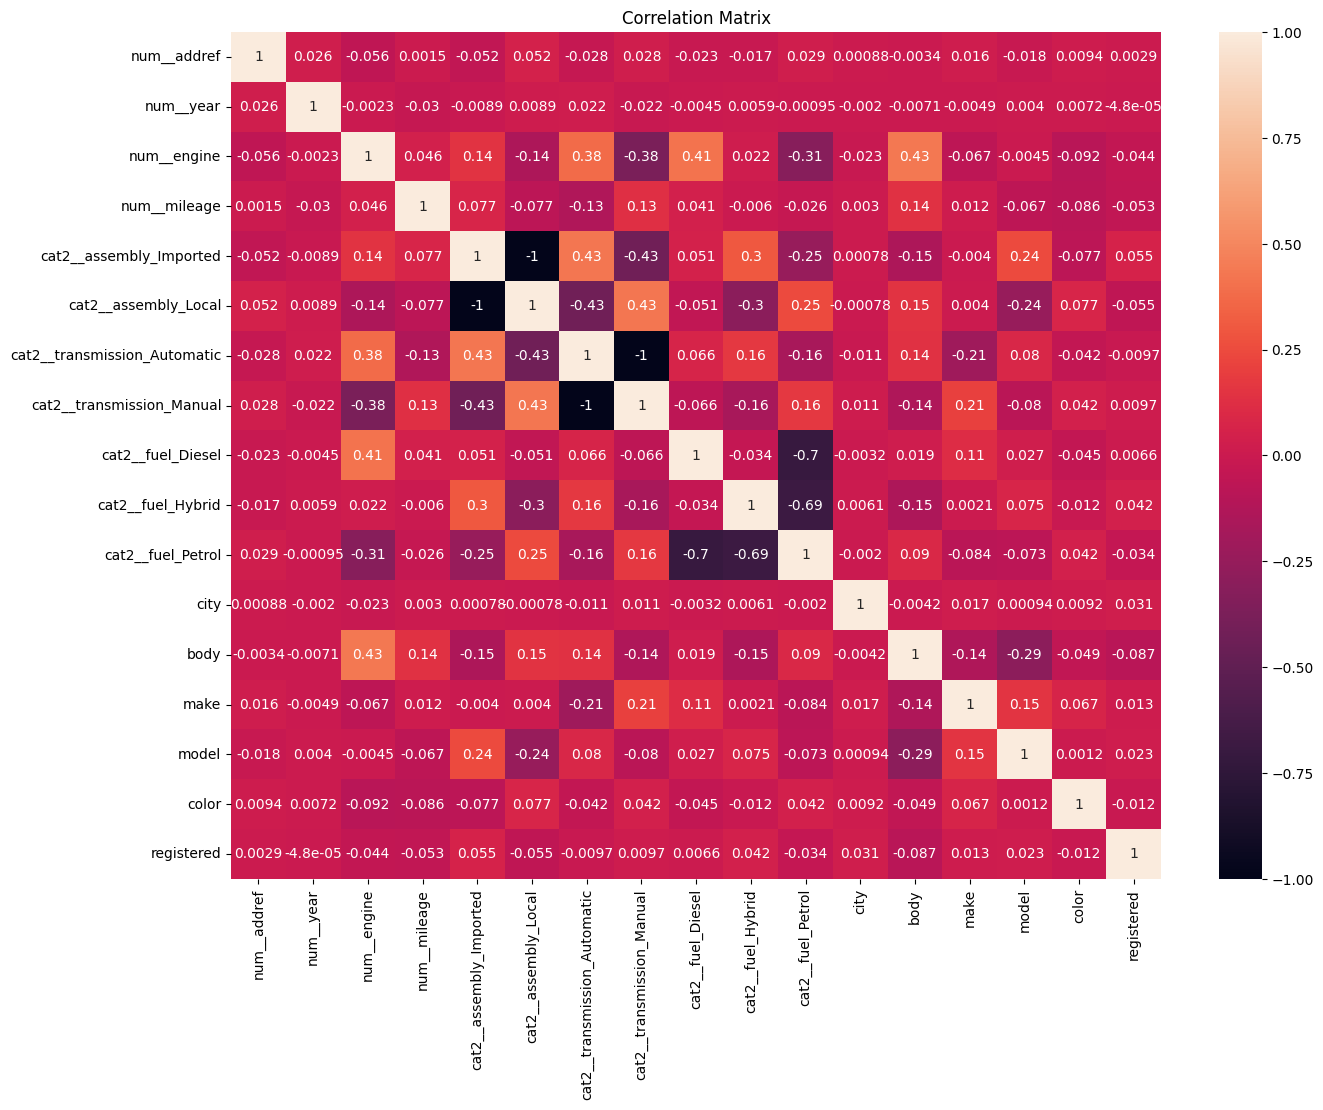

In [60]:
# correlation matrix
correlation_matrix = combined.corr()

plt.figure(figsize=(15, 11))
# Heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Data Engineering


In [61]:
combined.head()

,num__addref,num__year,num__engine,num__mileage,cat2__assembly_Imported,cat2__assembly_Local,cat2__transmission_Automatic,cat2__transmission_Manual,cat2__fuel_Diesel,cat2__fuel_Hybrid,cat2__fuel_Petrol,city,body,make,model,color,registered
0,0.533910,0.984824,-0.150258,0.640974,0.0,1.0,0.0,1.0,0.0,0.0,1.0,209,16,45,81,306,55
1,-0.307251,0.745899,-0.150258,1.654827,0.0,1.0,0.0,1.0,0.0,0.0,1.0,155,16,19,71,44,55
2,0.533929,1.131855,-0.150258,-0.366916,0.0,1.0,0.0,1.0,0.0,0.0,1.0,155,16,45,302,336,80
3,0.533914,1.058340,-0.150258,-0.050832,0.0,1.0,0.0,1.0,0.0,0.0,1.0,155,7,44,259,164,37
4,0.454105,1.058340,0.636057,-0.062760,0.0,1.0,1.0,0.0,0.0,0.0,1.0,155,16,19,72,164,55


In [62]:
plt.style.use("seaborn-whitegrid")

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
a = combined.copy()
b = y.copy()

# Label encoding for categoricals
for colname in a.select_dtypes("object"):
    a[colname], _ = a[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = a.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(a, b, discrete_features):
    mi_scores = mutual_info_regression(a, b, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=a.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(a, b, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

model                      1.006491
num__mileage               0.498466
body                       0.396006
num__year                  0.226407
cat2__assembly_Imported    0.055866
cat2__fuel_Diesel          0.037513
Name: MI Scores, dtype: float64

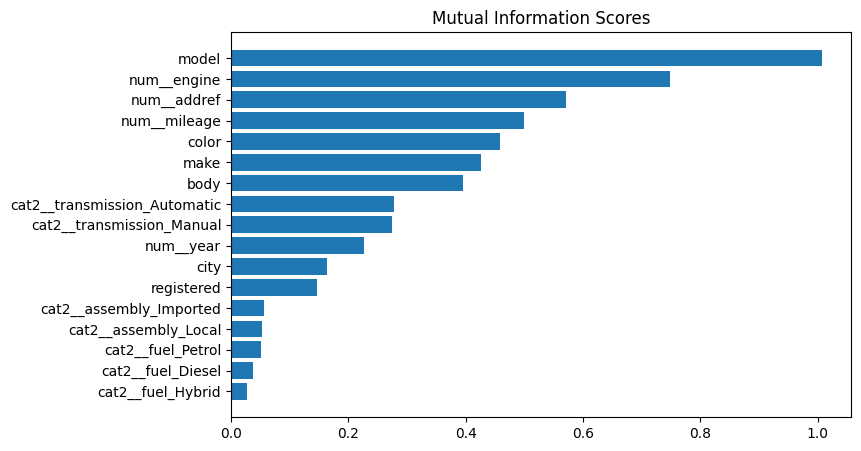

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# **3. Regression Models**

## 1. Linear Regressor

Linear Regression is a simple and interpretable model that serves as a good baseline. \
It assumes a linear relationship between the features. \
It is simple and computationally efficient.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model's performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("MSE:", mse_linear)
print("R^2 Score:", r2_linear)

MSE: 14432526955143.059
R^2 Score: 0.4474837975521877


## 2. Random Forest

Random Forest is an ensemble method that combines multiple decision trees to improve predictive performance and control overfitting. \
It also captures non-linear relationships. 

In [64]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("MSE:", mse_rf)
print("R^2 Score:", r2_rf)

MSE: 2544110865175.614
R^2 Score: 0.9026045488636945


## 3. Support Vector Regressor 

Has ability to handle non-linear relationships effectively through the use of kernel functions. \
SVR's has a capacity to generalize well in high-dimensional spaces makes it particularly suitable for our dataset, which includes diverse features such as city, make, and model. \
By incorporating SVR, we can leverage these strengths to potentially achieve more accurate and reliable predictions compared to other regression models.

In [31]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)

svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model's performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("MSE:", mse_svr)
print("R^2 Score:", r2_svr)


MSE: 27323232332568.68
R^2 Score: -0.046007301002161105


## 4. XGBoost

XGBoost is a more powerful gradient boosting model. \
It builds an ensemble of trees sequentially, with each tree correcting the errors of the previous ones. 
XGBoost includes regularization to prevent overfitting and can handle missing values internally.

In [65]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("MSE:", mse_xgb)
print("R^2 Score:", r2_xgb)


MSE: 2004841494133.1482
R^2 Score: 0.9232492402549429


In [66]:
print("\nSummary of Model Performance:")
print("Linear Regression - Mean Squared Error:", mse_linear, ", R^2 Score:", r2_linear)
print("Random Forest Regressor - Mean Squared Error:", mse_rf, ", R^2 Score:", r2_rf)
print("XGBoost Regressor - Mean Squared Error:", mse_xgb, ", R^2 Score:", r2_xgb)
print("Support Vector Regressor - Mean Squared Error:", mse_svr, ", R^2 Score:", r2_svr)



Summary of Model Performance:
Linear Regression - Mean Squared Error: 14432526955143.059 , R^2 Score: 0.4474837975521877
Random Forest Regressor - Mean Squared Error: 2544110865175.614 , R^2 Score: 0.9026045488636945
XGBoost Regressor - Mean Squared Error: 2004841494133.1482 , R^2 Score: 0.9232492402549429
Support Vector Regressor - Mean Squared Error: 27323232332568.68 , R^2 Score: -0.046007301002161105
